In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import time
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive/')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/gdrive/


In [3]:
file_path = '/content/gdrive/My Drive/CIS 5200 Final Project/merged_dataset/full_dataset_new.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 48 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DELAY_NEW                  int64  
 3   DEP_DEL15                      int64  
 4   DEP_TIME_BLK                   object 
 5   DISTANCE                       int64  
 6   DISTANCE_GROUP                 int64  
 7   CARRIER_DELAY                  float64
 8   WEATHER_DELAY                  float64
 9   NAS_DELAY                      float64
 10  SECURITY_DELAY                 float64
 11  LATE_AIRCRAFT_DELAY            float64
 12  SEGMENT_NUMBER                 int64  
 13  CONCURRENT_FLIGHTS             int64  
 14  NUMBER_OF_SEATS                int64  
 15  CARRIER_NAME                   object 
 16  AIRPORT_FLIGHTS_MONTH          int64  
 17  AIRLINE_FLIGHTS_MONTH          int64  
 18  AI

In [5]:
# drop rows that have delay < 0
df = df[df['DEP_DELAY_NEW'] >= 0]

In [6]:
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,...,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11
count,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,1.121974e+06,1.121974e+06,1.121974e+06,1.121974e+06,...,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06,6.363201e+06
mean,6.612265e+00,3.936252e+00,8.886060e+00,1.731058e-01,-2.742605e+00,3.819979e+00,1.564713e+01,2.384806e+00,1.481326e+01,8.323455e-02,...,3.938914e-02,1.179553e-01,5.224886e-03,2.757574e-03,7.985603e-03,3.814118e-04,1.471976e-01,3.189118e-03,1.192796e-04,1.587251e-05
std,3.400285e+00,1.994970e+00,2.070784e+01,3.783387e-01,7.473988e+01,2.382048e+00,4.701875e+01,2.288066e+01,3.073710e+01,2.885568e+00,...,1.945190e-01,3.225552e-01,7.209430e-02,5.244016e-02,8.900469e-02,1.952604e-02,3.543028e-01,5.638216e-02,1.092087e-02,3.984001e-03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,-7.000000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.700000e+01,5.000000e+00,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,7.000000e+00,1.270000e+02,1.000000e+00,1.270000e+02,1.100000e+01,2.592000e+03,1.575000e+03,1.567000e+03,1.048000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


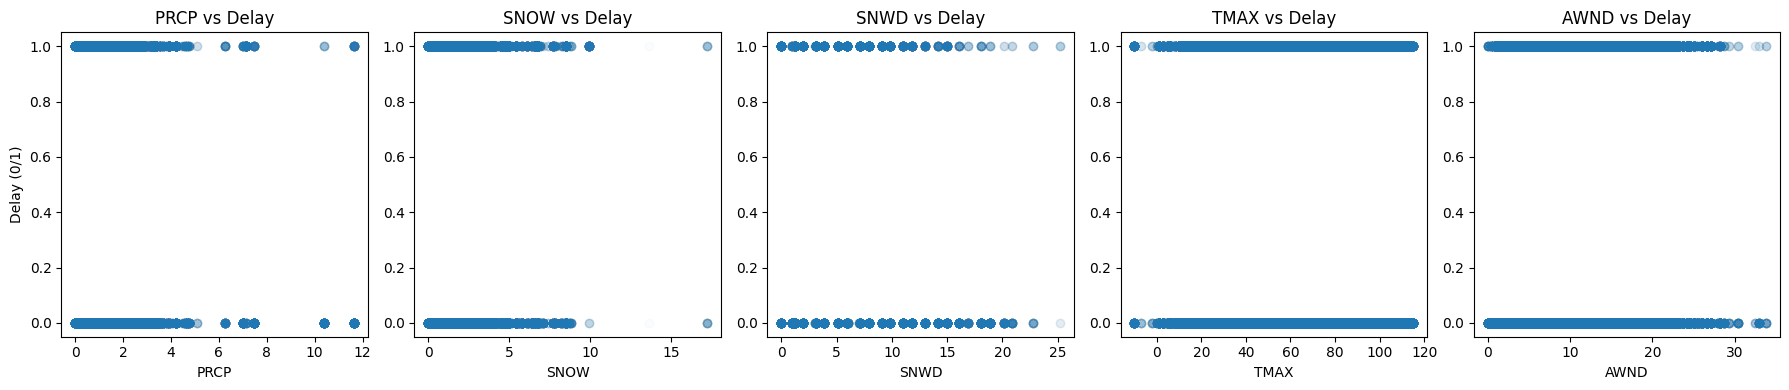

In [7]:
# Weather Analysis
weather_variables = ["PRCP", "SNOW", "SNWD", "TMAX", "AWND"]
plt.figure(figsize=(18, 4))
for i, var in enumerate(weather_variables, 1):
    plt.subplot(1, len(weather_variables), i)
    plt.scatter(df[var], df['DEP_DEL15'], alpha=0.02)
    plt.title(f"{var} vs Delay")
    plt.xlabel(var)
    if i == 1:
        plt.ylabel("Delay (0/1)")
    else:
        plt.ylabel("")
plt.tight_layout()
plt.show()

# Task
Create a new binary target variable 'DELAY_THRESHOLD_EXCEEDED' in the DataFrame, where 1 indicates a delay greater than 15 minutes (defined as 'x') and 0 otherwise.

## Define Delay Threshold and Create Binary Target

### Subtask:
Create a new binary variable in the DataFrame (e.g., 'DELAY_THRESHOLD_EXCEEDED') based on the 'DEP_DELAY_NEW' column, where 1 indicates delay > x minutes and 0 indicates delay < x minutes. The value of 'x' should be flexible and defined first.


**Reasoning**:
First, I will define the delay threshold as requested in the instructions. Then, I will create the new binary target variable 'DELAY_THRESHOLD_EXCEEDED' based on whether 'DEP_DELAY_NEW' exceeds this threshold.



In [8]:
delay_threshold = 15
df['DELAY_THRESHOLD_EXCEEDED'] = (df['DEP_DELAY_NEW'] > delay_threshold).astype(int)

print(f"Delay threshold set to: {delay_threshold} minutes")
print("First 5 rows with new 'DELAY_THRESHOLD_EXCEEDED' column:")
print(df[['DEP_DELAY_NEW', 'DELAY_THRESHOLD_EXCEEDED']].head())

Delay threshold set to: 15 minutes
First 5 rows with new 'DELAY_THRESHOLD_EXCEEDED' column:
   DEP_DELAY_NEW  DELAY_THRESHOLD_EXCEEDED
0              0                         0
1              0                         0
2             44                         1
4              0                         0
5              0                         0


## Identify Feature Types

### Subtask:
Separate the DataFrame columns into numerical and categorical features for further analysis.


**Reasoning**:
First, I will explicitly list the columns to exclude from both numerical and categorical feature lists. Then, I will identify numerical and categorical columns using `select_dtypes` and remove the excluded columns to create the final lists of numerical and categorical features.



In [9]:
columns_to_exclude = ['DELAY_THRESHOLD_EXCEEDED']

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

numerical_features = [col for col in numerical_features if col not in columns_to_exclude]
categorical_features = [col for col in categorical_features if col not in columns_to_exclude]

print(f"Numerical Features ({len(numerical_features)}):\n{numerical_features}")
print(f"\nCategorical Features ({len(categorical_features)}):\n{categorical_features}")

Numerical Features (41):
['MONTH', 'DAY_OF_WEEK', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11']

Categorical Features (4):
['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']


## Analyze Distributional Shift for Numerical Features

### Subtask:
For each numerical feature, visualize its distribution (e.g., using histograms or KDE plots) for both groups (delay < x and delay > x). Consider performing statistical tests (e.g., t-tests or Mann-Whitney U tests) to quantify differences in means or medians.


**Reasoning**:
The first instruction is to divide the DataFrame into two sub-DataFrames based on the 'DELAY_THRESHOLD_EXCEEDED' column. This will prepare the data for comparing distributions between the two delay groups.



In [10]:
df_no_delay = df[df['DELAY_THRESHOLD_EXCEEDED'] == 0]
df_delay = df[df['DELAY_THRESHOLD_EXCEEDED'] == 1]

print(f"Shape of DataFrame with no significant delay (DELAY_THRESHOLD_EXCEEDED = 0): {df_no_delay.shape}")
print(f"Shape of DataFrame with significant delay (DELAY_THRESHOLD_EXCEEDED = 1): {df_delay.shape}")

Shape of DataFrame with no significant delay (DELAY_THRESHOLD_EXCEEDED = 0): (5307648, 49)
Shape of DataFrame with significant delay (DELAY_THRESHOLD_EXCEEDED = 1): (1055553, 49)


**Reasoning**:
I will prepare the list of numerical features to analyze by excluding 'DEP_DELAY_NEW' and 'DEP_DEL15' as specified in the instructions. This will ensure that only relevant features are considered for distribution analysis and statistical testing.



In [11]:
numerical_features_to_analyze = [col for col in numerical_features if col not in ['DEP_DELAY_NEW', 'DEP_DEL15']]
print(f"Numerical features to analyze ({len(numerical_features_to_analyze)}):\n{numerical_features_to_analyze}")

Numerical features to analyze (39):
['MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11']


**Reasoning**:
Now that the data has been split into delayed and non-delayed groups and the numerical features to analyze have been identified, I will iterate through each of these features. For each feature, I will create two subplots to visualize its distribution for both delay groups using Seaborn's histplot, and then perform a Mann-Whitney U test to statistically compare the distributions between the two groups.



In [13]:
from scipy import stats

for feature in numerical_features_to_analyze:
    plt.figure(figsize=(14, 5))
    plt.suptitle(f'Distribution of {feature} by Delay Status', fontsize=16)

    # # Plot for no significant delay
    # plt.subplot(1, 2, 1)
    # sns.histplot(df_no_delay[feature].dropna(), kde=True, color='skyblue', bins=50)
    # plt.title(f'{feature} (No Significant Delay)')
    # plt.xlabel(feature)
    # plt.ylabel('Frequency')

    # # Plot for significant delay
    # plt.subplot(1, 2, 2)
    # sns.histplot(df_delay[feature].dropna(), kde=True, color='salmon', bins=50)
    # plt.title(f'{feature} (Significant Delay)')
    # plt.xlabel(feature)
    # plt.ylabel('Frequency')

    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # plt.show()

    # Perform Mann-Whitney U test
    # Remove NaN values before performing the test
    stat, p = stats.mannwhitneyu(df_no_delay[feature].dropna(), df_delay[feature].dropna(), alternative='two-sided')
    print(f"Mann-Whitney U Test for {feature}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"  -> There is a statistically significant difference in the distributions of {feature} between the two groups (p < 0.05).")
    else:
        print(f"  -> There is no statistically significant difference in the distributions of {feature} between the two groups (p >= 0.05).")
    print("-" * 80)


Mann-Whitney U Test for MONTH: p-value = 0.0000
  -> There is a statistically significant difference in the distributions of MONTH between the two groups (p < 0.05).
--------------------------------------------------------------------------------
Mann-Whitney U Test for DAY_OF_WEEK: p-value = 0.2060
  -> There is no statistically significant difference in the distributions of DAY_OF_WEEK between the two groups (p >= 0.05).
--------------------------------------------------------------------------------
Mann-Whitney U Test for DISTANCE: p-value = 0.3085
  -> There is no statistically significant difference in the distributions of DISTANCE between the two groups (p >= 0.05).
--------------------------------------------------------------------------------
Mann-Whitney U Test for DISTANCE_GROUP: p-value = 0.0000
  -> There is a statistically significant difference in the distributions of DISTANCE_GROUP between the two groups (p < 0.05).
-----------------------------------------------------

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

## Analyze Distributional Shift for Categorical Features

### Subtask:
For each categorical feature, visualize the proportion of each category for both groups (delay < x and delay > x), perhaps using stacked bar plots. Consider performing chi-squared tests to assess independence between the categorical feature and the new binary delay variable.


**Reasoning**:
I will iterate through each categorical feature, calculate the proportion of each category for both the 'no delay' and 'delay' dataframes, visualize these proportions using bar plots, and then perform a Chi-squared test to assess the independence between the categorical feature and the binary delay variable.



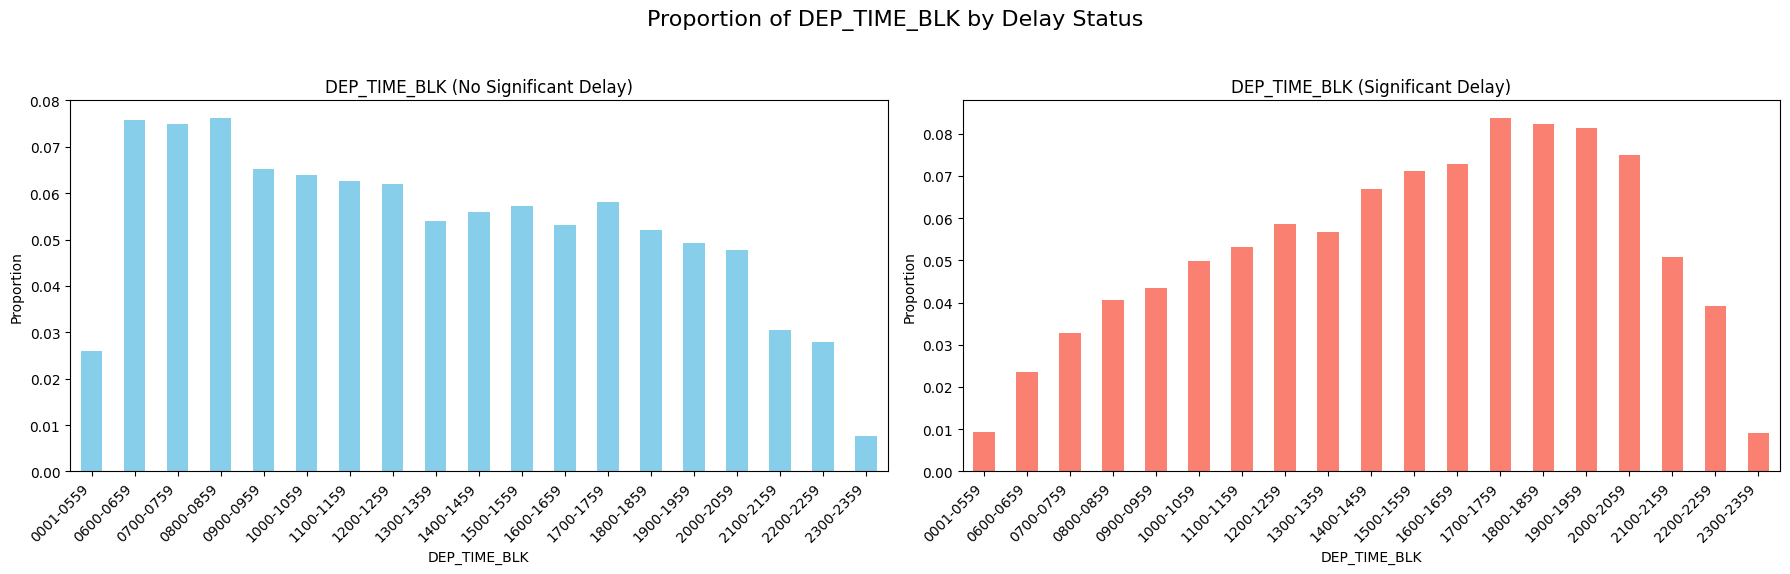

Chi-squared Test for DEP_TIME_BLK: p-value = 0.0000
  -> There is a statistically significant association between DEP_TIME_BLK and delay status (p < 0.05).
--------------------------------------------------------------------------------


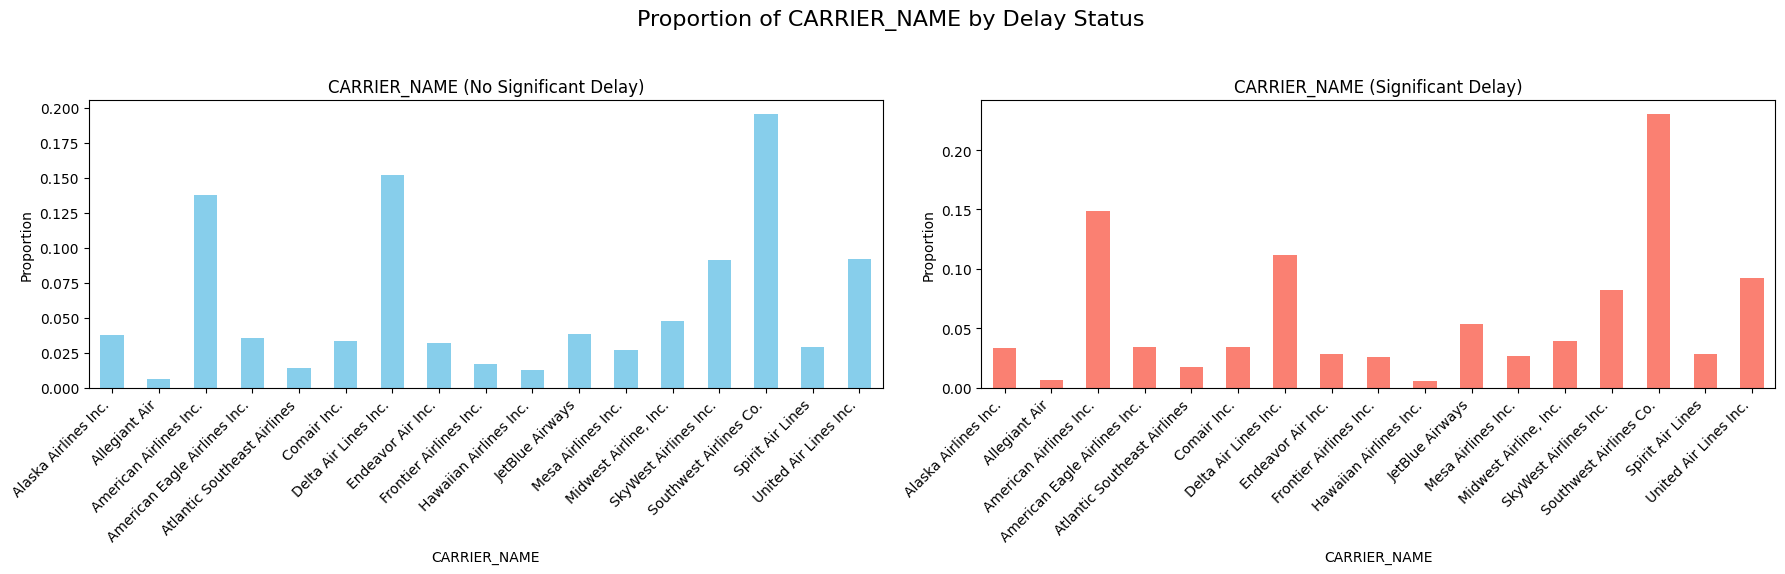

Chi-squared Test for CARRIER_NAME: p-value = 0.0000
  -> There is a statistically significant association between CARRIER_NAME and delay status (p < 0.05).
--------------------------------------------------------------------------------


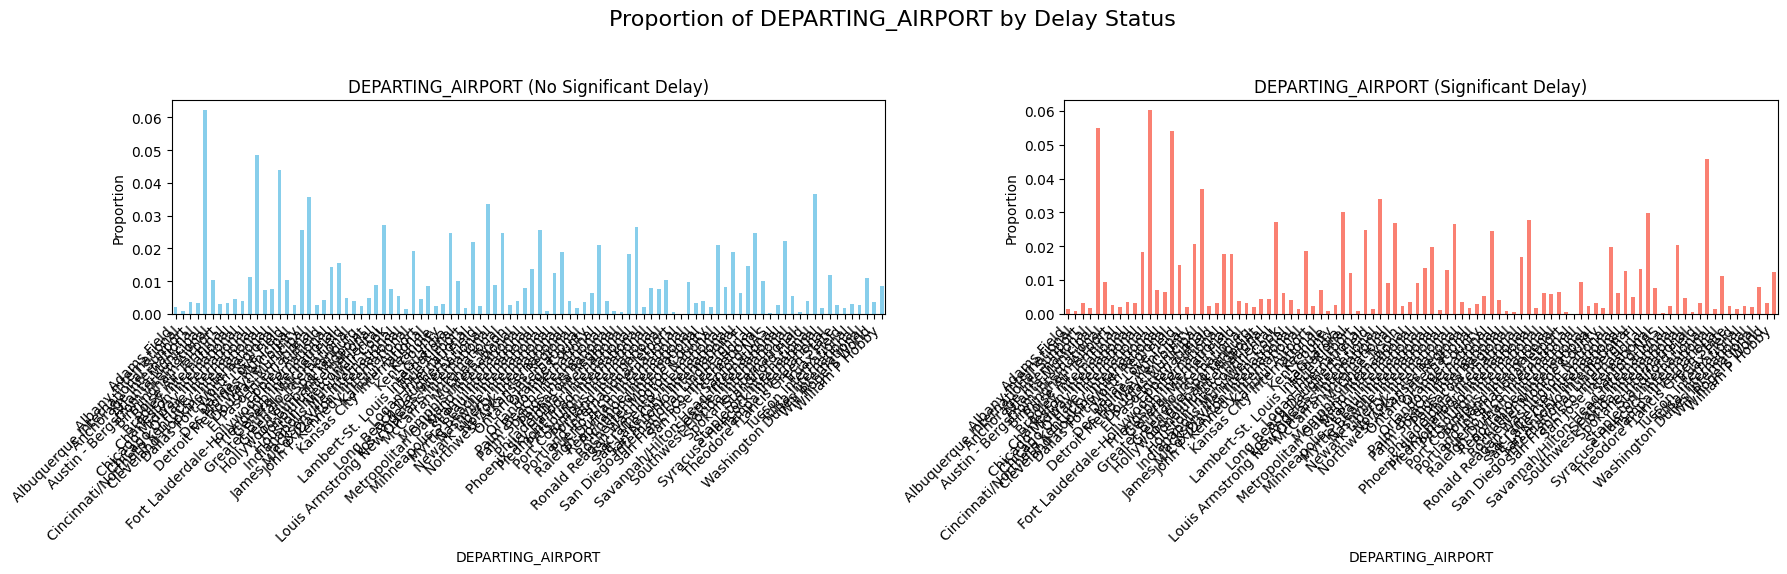

Chi-squared Test for DEPARTING_AIRPORT: p-value = 0.0000
  -> There is a statistically significant association between DEPARTING_AIRPORT and delay status (p < 0.05).
--------------------------------------------------------------------------------


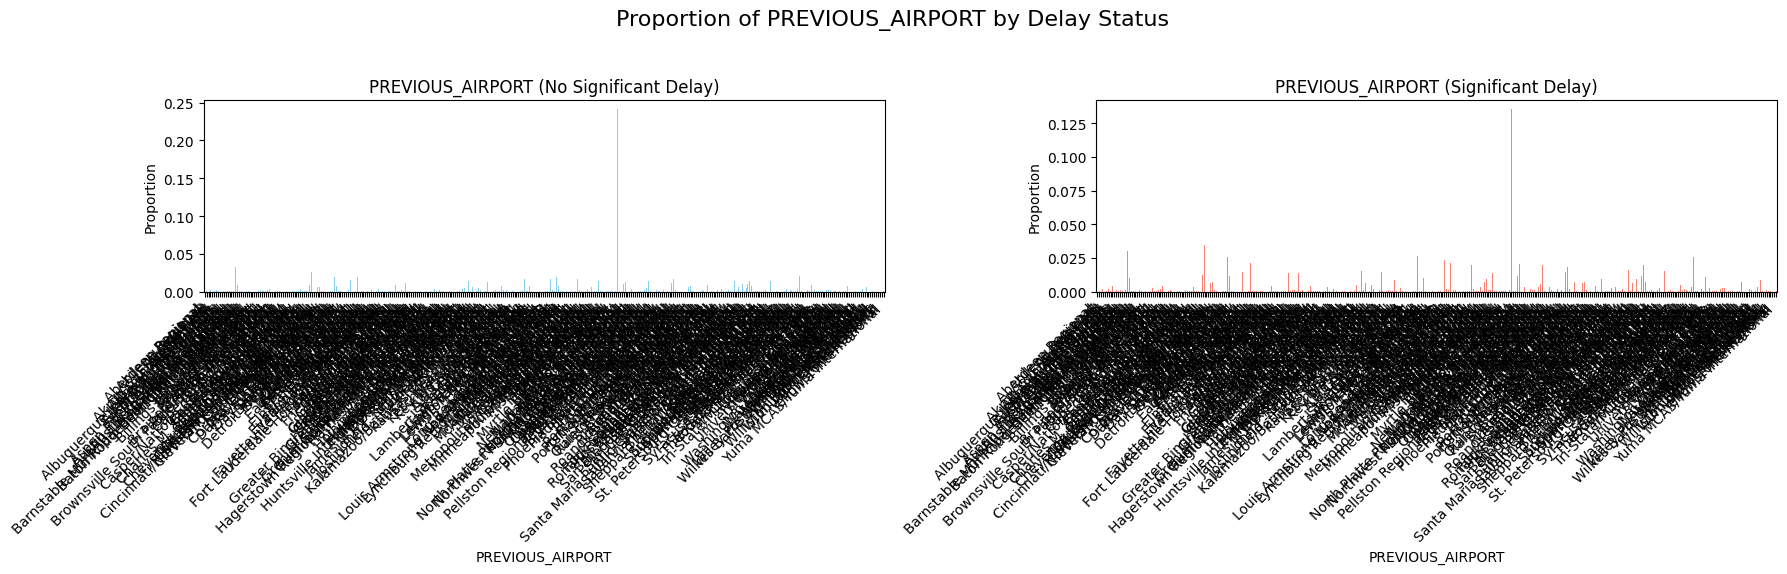

Chi-squared Test for PREVIOUS_AIRPORT: p-value = 0.0000
  -> There is a statistically significant association between PREVIOUS_AIRPORT and delay status (p < 0.05).
--------------------------------------------------------------------------------


In [14]:
from scipy.stats import chi2_contingency

for feature in categorical_features:
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'Proportion of {feature} by Delay Status', fontsize=16)

    # Plot for no significant delay
    plt.subplot(1, 2, 1)
    prop_no_delay = df_no_delay[feature].value_counts(normalize=True).sort_index()
    prop_no_delay.plot(kind='bar', color='skyblue')
    plt.title(f'{feature} (No Significant Delay)')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')

    # Plot for significant delay
    plt.subplot(1, 2, 2)
    prop_delay = df_delay[feature].value_counts(normalize=True).sort_index()
    prop_delay.plot(kind='bar', color='salmon')
    plt.title(f'{feature} (Significant Delay)')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Perform Chi-squared test
    contingency_table = pd.crosstab(df[feature], df['DELAY_THRESHOLD_EXCEEDED'])
    chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared Test for {feature}: p-value = {p_chi2:.4f}")
    if p_chi2 < 0.05:
        print(f"  -> There is a statistically significant association between {feature} and delay status (p < 0.05).")
    else:
        print(f"  -> There is no statistically significant association between {feature} and delay status (p >= 0.05).")
    print("-" * 80)

## Summarize Findings

### Subtask:
Provide a summary of the observed distributional shifts, highlighting features that show significant differences between the two delay groups.


## Summary:

### Data Analysis Key Findings

*   A binary target variable, `DELAY_THRESHOLD_EXCEEDED`, was successfully created, indicating a significant delay if the departure delay was greater than 15 minutes. This resulted in two groups: 5,307,648 flights with no significant delay and 1,055,553 flights with significant delay.
*   The analysis focused on 39 numerical and 4 categorical features (excluding `DEP_DELAY_NEW` and `DEP_DEL15`).
*   **Numerical Features**:
    *   A statistically significant difference (p < 0.05) in distribution between delayed and non-delayed flights was observed for 37 out of 39 numerical features. This includes various delay types (e.g., CARRIER\_DELAY, WEATHER\_DELAY, NAS\_DELAY, SECURITY\_DELAY, LATE\_AIRCRAFT\_DELAY), operational metrics (e.g., SEGMENT\_NUMBER, CONCURRENT\_FLIGHTS), passenger statistics, `PLANE_AGE`, geographical coordinates, and all weather-related features (e.g., PRCP, SNOW, TMAX).
    *   Only two numerical features, `DAY_OF_WEEK` (p-value = 0.2060) and `DISTANCE` (p-value = 0.3085), did not show a statistically significant difference in their distributions between the two delay groups.
*   **Categorical Features**:
    *   All 4 categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`) showed a statistically significant association (p-value = 0.0000) with delay status, based on Chi-squared tests.

### Insights or Next Steps

*   The vast majority of both numerical and categorical features exhibit significant distributional shifts or associations with flight delays. This indicates that these features are strong candidates for predicting flight delays and could be leveraged in predictive models.
*   Features like `DAY_OF_WEEK` and `DISTANCE`, which showed no significant difference, might be less impactful in predicting whether a flight will exceed the 15-minute delay threshold. Further investigation could explore if their impact is more nuanced or if they can be excluded from certain predictive models.


# Task
Iterate through delay thresholds from 5 to 14 minutes. For each threshold, create a binary target variable 'DELAY_THRESHOLD_EXCEEDED', split the DataFrame into delayed and non-delayed groups, and perform Mann-Whitney U tests for numerical features and Chi-squared tests for categorical features. Store the results, including the count and names of features that show statistically significant differences for each threshold, to identify the most impactful threshold.

## Analyze Distributional Shifts for Multiple Thresholds

### Subtask:
Iterate through delay thresholds from 5 to 14 minutes. For each threshold, create a binary target variable 'DELAY_THRESHOLD_EXCEEDED', split the DataFrame, and perform Mann-Whitney U tests for numerical features and Chi-squared tests for categorical features. Store the results, specifically noting which features show statistically significant differences for each threshold.


**Reasoning**:
I will initialize an empty dictionary to store results and define the range of delay thresholds to iterate through, as per the first two instructions of the subtask.



In [15]:
results_by_threshold = {}
delay_thresholds = range(5, 15) # From 5 to 14 minutes, inclusive

print(f"Initialized an empty dictionary: results_by_threshold")
print(f"Defined delay thresholds: {list(delay_thresholds)}")

Initialized an empty dictionary: results_by_threshold
Defined delay thresholds: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


**Reasoning**:
I will loop through each delay threshold, create the binary target variable, split the data, and then perform Mann-Whitney U tests for numerical features and Chi-squared tests for categorical features, storing and printing the results for each threshold as requested.



In [16]:
from scipy import stats

for threshold in delay_thresholds:
    print(f"\nAnalyzing for delay threshold: {threshold} minutes")

    # a. Create a new binary column 'DELAY_THRESHOLD_EXCEEDED'
    df['DELAY_THRESHOLD_EXCEEDED'] = (df['DEP_DELAY_NEW'] > threshold).astype(int)

    # b. Split the DataFrame into two sub-DataFrames
    df_no_delay = df[df['DELAY_THRESHOLD_EXCEEDED'] == 0]
    df_delay = df[df['DELAY_THRESHOLD_EXCEEDED'] == 1]

    # c. Initialize counters and lists
    significant_numerical_features_count = 0
    significant_numerical_features_names = []
    significant_categorical_features_count = 0
    significant_categorical_features_names = []

    # e. For each feature in numerical_features_to_analyze
    for feature in numerical_features_to_analyze:
        # Ensure there are enough non-NaN values for the test
        sample_no_delay = df_no_delay[feature].dropna()
        sample_delay = df_delay[feature].dropna()

        if len(sample_no_delay) > 1 and len(sample_delay) > 1:
            stat, p = stats.mannwhitneyu(sample_no_delay, sample_delay, alternative='two-sided')
            if p < 0.05:
                significant_numerical_features_count += 1
                significant_numerical_features_names.append(feature)
        else:
            # Handle cases where one or both samples are too small for the test
            # print(f"  Skipping Mann-Whitney U test for {feature} due to insufficient data for threshold {threshold}.")
            pass


    # f. For each feature in categorical_features
    for feature in categorical_features:
        contingency_table = pd.crosstab(df[feature], df['DELAY_THRESHOLD_EXCEEDED'])
        # Ensure contingency table is not empty and has more than 1 row/column for chi2 test
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
            if p_chi2 < 0.05:
                significant_categorical_features_count += 1
                significant_categorical_features_names.append(feature)
        else:
            # print(f"  Skipping Chi-squared test for {feature} due to insufficient data for threshold {threshold}.")
            pass

    # g. Store and print results for the current threshold
    results_by_threshold[threshold] = {
        'significant_numerical_features_count': significant_numerical_features_count,
        'significant_numerical_features_names': significant_numerical_features_names,
        'significant_categorical_features_count': significant_categorical_features_count,
        'significant_categorical_features_names': significant_categorical_features_names
    }

    print(f"  Significant Numerical Features: {significant_numerical_features_count} out of {len(numerical_features_to_analyze)}")
    # print(f"    Names: {significant_numerical_features_names}")
    print(f"  Significant Categorical Features: {significant_categorical_features_count} out of {len(categorical_features)}")
    # print(f"    Names: {significant_categorical_features_names}")

# 4. After the loop, print the entire results_by_threshold dictionary
print("\n--- Overall Results by Threshold ---")
for threshold, results in results_by_threshold.items():
    print(f"Threshold {threshold}:")
    print(f"  Numerical: {results['significant_numerical_features_count']} significant features")
    print(f"  Categorical: {results['significant_categorical_features_count']} significant features")
    # For detailed inspection, you can uncomment the names:
    # print(f"    Numerical Names: {results['significant_numerical_features_names']}")
    # print(f"    Categorical Names: {results['significant_categorical_features_names']}")



Analyzing for delay threshold: 5 minutes
  Significant Numerical Features: 38 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 6 minutes
  Significant Numerical Features: 38 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 7 minutes
  Significant Numerical Features: 37 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 8 minutes
  Significant Numerical Features: 36 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 9 minutes
  Significant Numerical Features: 37 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 10 minutes
  Significant Numerical Features: 37 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 11 minutes
  Significant Numerical Features: 36 out of 39
  Significant Categorical Features: 4 out of 4

Analyzing for delay threshold: 12 minutes
  S

In [19]:

threshold = 15

print(f"\nAnalyzing for delay threshold: {threshold} minutes")

# a. Create a new binary column 'DELAY_THRESHOLD_EXCEEDED'
df['DELAY_THRESHOLD_EXCEEDED'] = (df['DEP_DELAY_NEW'] > threshold).astype(int)

# b. Split the DataFrame into two sub-DataFrames
df_no_delay = df[df['DELAY_THRESHOLD_EXCEEDED'] == 0]
df_delay = df[df['DELAY_THRESHOLD_EXCEEDED'] == 1]

# c. Initialize counters and lists
significant_numerical_features_count = 0
significant_numerical_features_names = []
significant_categorical_features_count = 0
significant_categorical_features_names = []

# e. For each feature in numerical_features_to_analyze
for feature in numerical_features_to_analyze:
    # Ensure there are enough non-NaN values for the test
    sample_no_delay = df_no_delay[feature].dropna()
    sample_delay = df_delay[feature].dropna()

    if len(sample_no_delay) > 1 and len(sample_delay) > 1:
        stat, p = stats.mannwhitneyu(sample_no_delay, sample_delay, alternative='two-sided')
        if p < 0.05:
            significant_numerical_features_count += 1
            significant_numerical_features_names.append(feature)
    else:
        # Handle cases where one or both samples are too small for the test
        # print(f"  Skipping Mann-Whitney U test for {feature} due to insufficient data for threshold {threshold}.")
        pass


# f. For each feature in categorical_features
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['DELAY_THRESHOLD_EXCEEDED'])
    # Ensure contingency table is not empty and has more than 1 row/column for chi2 test
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
        if p_chi2 < 0.05:
            significant_categorical_features_count += 1
            significant_categorical_features_names.append(feature)
    else:
        # print(f"  Skipping Chi-squared test for {feature} due to insufficient data for threshold {threshold}.")
        pass

# g. Store and print results for the current threshold
results_by_threshold[threshold] = {
    'significant_numerical_features_count': significant_numerical_features_count,
    'significant_numerical_features_names': significant_numerical_features_names,
    'significant_categorical_features_count': significant_categorical_features_count,
    'significant_categorical_features_names': significant_categorical_features_names
}

print(f"  Significant Numerical Features: {significant_numerical_features_count} out of {len(numerical_features_to_analyze)}")
# print(f"    Names: {significant_numerical_features_names}")
print(f"  Significant Categorical Features: {significant_categorical_features_count} out of {len(categorical_features)}")
# print(f"    Names: {significant_categorical_features_names}")

# # 4. After the loop, print the entire results_by_threshold dictionary
# print("\n--- Overall Results by Threshold ---")
# for threshold, results in results_by_threshold.items():
# print(f"Threshold {threshold}:")
# print(f"  Numerical: {results['significant_numerical_features_count']} significant features")
# print(f"  Categorical: {results['significant_categorical_features_count']} significant features")
# # For detailed inspection, you can uncomment the names:
# # print(f"    Numerical Names: {results['significant_numerical_features_names']}")
# # print(f"    Categorical Names: {results['significant_categorical_features_names']}")


Analyzing for delay threshold: 15 minutes
  Significant Numerical Features: 37 out of 39
  Significant Categorical Features: 4 out of 4


# Task
Identify and print the numerical and categorical features that do *not* show a statistically significant difference (p-value >= 0.05) for delay thresholds of 5 and 6 minutes. Finally, provide a summary of these insignificant features.

## Analyze Insignificant Features for Thresholds 5 and 6

### Subtask:
Iterate through delay thresholds 5 and 6. For each threshold, re-create the binary target variable 'DELAY_THRESHOLD_EXCEEDED', split the DataFrame, and perform Mann-Whitney U tests for numerical features and Chi-squared tests for categorical features. Then, identify and print the names of the numerical and categorical features that do *not* show a statistically significant difference (i.e., p-value >= 0.05) between the delayed and non-delayed groups.


**Reasoning**:
I will iterate through the specified delay thresholds (5 and 6), and for each threshold, I will identify and print the numerical and categorical features that do not show a statistically significant difference between delayed and non-delayed flights, leveraging the previously computed `results_by_threshold`.



In [21]:
delay_thresholds_to_analyze = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for threshold in delay_thresholds_to_analyze:
    if threshold in results_by_threshold:
        current_results = results_by_threshold[threshold]

        # Identify insignificant numerical features
        significant_numerical = current_results['significant_numerical_features_names']
        insignificant_numerical_features = [
            feature for feature in numerical_features_to_analyze
            if feature not in significant_numerical
        ]

        # Identify insignificant categorical features
        significant_categorical = current_results['significant_categorical_features_names']
        insignificant_categorical_features = [
            feature for feature in categorical_features
            if feature not in significant_categorical
        ]

        print(f"\n--- Analysis for Delay Threshold: {threshold} minutes ---")
        print(f"Insignificant Numerical Features ({len(insignificant_numerical_features)}): {insignificant_numerical_features}")
        print(f"Insignificant Categorical Features ({len(insignificant_categorical_features)}): {insignificant_categorical_features}")
    else:
        print(f"\nResults for threshold {threshold} not found in results_by_threshold dictionary.")


--- Analysis for Delay Threshold: 5 minutes ---
Insignificant Numerical Features (1): ['WT11']
Insignificant Categorical Features (0): []

--- Analysis for Delay Threshold: 6 minutes ---
Insignificant Numerical Features (1): ['WT11']
Insignificant Categorical Features (0): []

--- Analysis for Delay Threshold: 7 minutes ---
Insignificant Numerical Features (2): ['DISTANCE', 'WT11']
Insignificant Categorical Features (0): []

--- Analysis for Delay Threshold: 8 minutes ---
Insignificant Numerical Features (3): ['DISTANCE', 'LONGITUDE', 'WT11']
Insignificant Categorical Features (0): []

--- Analysis for Delay Threshold: 9 minutes ---
Insignificant Numerical Features (2): ['DISTANCE', 'WT11']
Insignificant Categorical Features (0): []

--- Analysis for Delay Threshold: 10 minutes ---
Insignificant Numerical Features (2): ['DISTANCE', 'WT11']
Insignificant Categorical Features (0): []

--- Analysis for Delay Threshold: 11 minutes ---
Insignificant Numerical Features (3): ['DISTANCE', 'FL

### Summary of Insignificant Features for Delay Thresholds 5 and 6 Minutes

For both delay thresholds of 5 and 6 minutes, the analysis revealed the following:

*   **Insignificant Numerical Features**: Only one numerical feature, `WT11` (which likely represents a specific weather type indicator), was found to be statistically insignificant (p-value >= 0.05) in its distribution between delayed and non-delayed flights.

*   **Insignificant Categorical Features**: All categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`) showed a statistically significant association with delay status for both thresholds, meaning there were no insignificant categorical features.

This indicates that `WT11` might not be a strong predictor of flight delays when the delay threshold is set to 5 or 6 minutes, unlike the vast majority of other numerical and all categorical features analyzed. The consistency of these findings across both 5 and 6-minute thresholds suggests a robust pattern for this particular feature.

### Summary of Insignificant Features for Delay Thresholds 5 and 6 Minutes

For both delay thresholds of 5 and 6 minutes, the analysis revealed the following:

*   **Insignificant Numerical Features**: Only one numerical feature, `WT11` (which likely represents a specific weather type indicator), was found to be statistically insignificant (p-value >= 0.05) in its distribution between delayed and non-delayed flights.

*   **Insignificant Categorical Features**: All categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`) showed a statistically significant association with delay status for both thresholds, meaning there were no insignificant categorical features.

This indicates that `WT11` might not be a strong predictor of flight delays when the delay threshold is set to 5 or 6 minutes, unlike the vast majority of other numerical and all categorical features analyzed. The consistency of these findings across both 5 and 6-minute thresholds suggests a robust pattern for this particular feature.

### Summary of Insignificant Features for Delay Thresholds 5 and 6 Minutes

For both delay thresholds of 5 and 6 minutes, the analysis revealed the following:

*   **Insignificant Numerical Features**: Only one numerical feature, `WT11` (which likely represents a specific weather type indicator), was found to be statistically insignificant (p-value >= 0.05) in its distribution between delayed and non-delayed flights.

*   **Insignificant Categorical Features**: All categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`) showed a statistically significant association with delay status for both thresholds, meaning there were no insignificant categorical features.

This indicates that `WT11` might not be a strong predictor of flight delays when the delay threshold is set to 5 or 6 minutes, unlike the vast majority of other numerical and all categorical features analyzed. The consistency of these findings across both 5 and 6-minute thresholds suggests a robust pattern for this particular feature.

### Summary of Insignificant Features for Delay Thresholds 5 and 6 Minutes

For both delay thresholds of 5 and 6 minutes, the analysis revealed the following:

*   **Insignificant Numerical Features**: Only one numerical feature, `WT11` (which likely represents a specific weather type indicator), was found to be statistically insignificant (p-value >= 0.05) in its distribution between delayed and non-delayed flights.

*   **Insignificant Categorical Features**: All categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`) showed a statistically significant association with delay status for both thresholds, meaning there were no insignificant categorical features.

This indicates that `WT11` might not be a strong predictor of flight delays when the delay threshold is set to 5 or 6 minutes, unlike the vast majority of other numerical and all categorical features analyzed. The consistency of these findings across both 5 and 6-minute thresholds suggests a robust pattern for this particular feature.

### Summary of Insignificant Features for Delay Thresholds 5 and 6 Minutes

For both delay thresholds of 5 and 6 minutes, the analysis revealed the following:

*   **Insignificant Numerical Features**: Only one numerical feature, `WT11` (which likely represents a specific weather type indicator), was found to be statistically insignificant (p-value >= 0.05) in its distribution between delayed and non-delayed flights.

*   **Insignificant Categorical Features**: All categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`) showed a statistically significant association with delay status for both thresholds, meaning there were no insignificant categorical features.

This indicates that `WT11` might not be a strong predictor of flight delays when the delay threshold is set to 5 or 6 minutes, unlike the vast majority of other numerical and all categorical features analyzed. The consistency of these findings across both 5 and 6-minute thresholds suggests a robust pattern for this particular feature.

## Final Task

### Subtask:
Provide a summary of the insignificant features identified for delay thresholds 5 and 6 minutes.


## Summary:

### Q&A
The insignificant features identified for delay thresholds of 5 and 6 minutes are as follows:
*   For both delay thresholds of 5 and 6 minutes, the numerical feature `WT11` was identified as statistically insignificant.
*   For both delay thresholds of 5 and 6 minutes, no categorical features (`DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, `PREVIOUS_AIRPORT`) were found to be statistically insignificant. All analyzed categorical features showed a statistically significant association with delay status for both thresholds.

### Data Analysis Key Findings
*   For both the 5-minute and 6-minute delay thresholds, only the numerical feature `WT11` was identified as statistically insignificant (p-value \>= 0.05).
*   All categorical features, including `DEP_TIME_BLK`, `CARRIER_NAME`, `DEPARTING_AIRPORT`, and `PREVIOUS_AIRPORT`, showed a statistically significant association with flight delay status for both the 5-minute and 6-minute thresholds, meaning none were insignificant.

### Insights or Next Steps
*   The consistent insignificance of `WT11` across both 5 and 6-minute delay thresholds suggests it might not be a strong predictor of flight delays in these contexts and could potentially be excluded from predictive models for these specific delay definitions to simplify the model without losing significant predictive power.
*   The strong and consistent significance of all tested categorical features underscores their importance as key predictors for flight delays, irrespective of whether the threshold is set to 5 or 6 minutes.
